In [90]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from scipy.special import erf

In [104]:
# some plotting settings
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})

In [134]:
RUNS = 100000 # total runs for sampling

Nbins = 100 # number of bins
mubg = 10.0 # simulated background level per bin
musig = 0.0 # simulated signal level for first bin

TS = []

In [135]:
# simulate and analyze samples with the given input parameters

Ntot = Nbins*mubg + musig
Nsig = musig

B = np.ones(Nbins)*mubg # simulated background
S = np.zeros(Nbins) # simulated signal
S[0] += musig
               
for run in range(0,RUNS) :
  
    #simulate binwise Poisson fluctuations
    bin = np.random.poisson(lam=S+B)
    
    #calcuate TS from maxLH (analytic version)
    totevents = np.sum(bin)

    bestfit = (bin[0]*Nbins-totevents)/(Nbins-1)
    
    if bestfit < 0.0 :
        TS.append(0.0)
    else :
        temp = 0.0
        if bin[0] > 0.0 :
            temp += 2.*bin[0]*np.log((Nbins*1./(totevents*1.))*bin[0])
        if totevents-bin[0] > 0.0 :
            temp += 2.*(totevents-bin[0]*1.)*np.log((Nbins*1./(totevents*1.))*(totevents-bin[0])/(Nbins-1.0))
        TS.append(temp)        

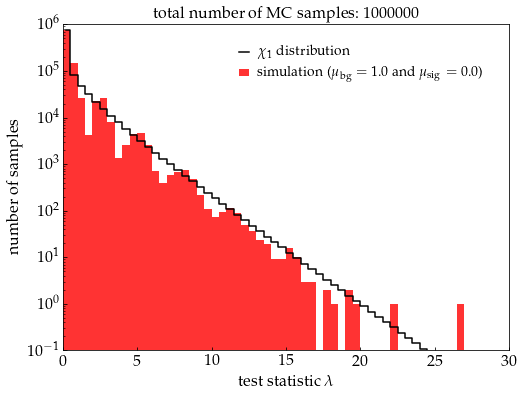

In [133]:
NTS = 60 # number of bins to be shown in histograms
delta = 0.5 # width of bins

# create a histogram of one-dimensional chi-square distribution 

chi2x = []
chi2y = []
for i in range(0,NTS) :
    chi2x.append((i+0.5)*delta)
    chi2y.append(0.5*len(TS)*(erf(np.sqrt((i+1)*delta/2.))-erf(np.sqrt((i)*delta/2.))))
chi2y[0] += 0.5*len(TS)  # create a histogram of one-dimensional chi-square distribution 

# plot histograms of simulation and prediction

fig = figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

xlim([0,30])
ylim([1e-1,len(TS)])

title(r'total number of MC samples: ' + str(len(TS)),fontsize=16)
xlabel(r'test statistic $\lambda$',fontsize=16)
ylabel(r'number of samples',fontsize=16)
ax.tick_params(axis='both',which='both',direction='in')

for tick in ax.xaxis.get_major_ticks() :
    tick.label.set_fontsize(16) 

for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(16)  
    
histTS = hist(TS,bins=np.arange(0,NTS*delta,delta),log=True,alpha=0.8,color="red",\
              label=r'simulation ($\mu_{\rm bg} = ' + str(mubg) + r'$ and $\mu_{\rm sig} = ' + str(musig) + '$)')

plot(chi2x,chi2y,color="black",drawstyle='steps-mid',label=r'$\chi_1$ distribution')

leg = plt.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.,fancybox=False,\
                 framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=1)
for t in leg.get_texts() :
    t.set_fontsize(14)